IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Mélissa Lacour & Céline Fan

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [9]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import random
import statistics
%matplotlib inline

import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# Importation de la librairie pickle
import pickle as pkl

%load_ext autoreload
%autoreload 2

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)


# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2','x3', 'x4', 'x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [11]:
data5D[0:5]

,x1,x2,x3,x4,x5,label
0,-0.472352,-0.035994,0.572799,2.017446,-1.865967,-1
1,1.993913,0.984667,-1.180237,1.460067,-0.195743,-1
2,0.923188,1.194008,0.065319,0.909784,0.832256,-1
3,2.540148,-0.427836,-0.113014,3.257095,-1.689755,-1
4,4.331413,0.590868,-1.105335,4.475987,-1.790176,-1


In [12]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [13]:
X5D[0:5]

array([[-0.4723522 , -0.03599385,  0.57279854,  2.01744639, -1.86596742],
       [ 1.9939134 ,  0.9846668 , -1.18023654,  1.46006741, -0.19574327],
       [ 0.92318832,  1.19400787,  0.06531872,  0.90978449,  0.83225595],
       [ 2.54014784, -0.42783646, -0.11301444,  3.2570952 , -1.68975456],
       [ 4.33141251,  0.59086794, -1.10533473,  4.47598742, -1.79017634]])

In [14]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [15]:
Y5D[0:5]

array([-1., -1., -1., -1., -1.])

Voici la classe abstraite Classifier:

In [16]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        cpt_ok = 0
        for i in range (0, len(desc_set)):
            if (self.predict(desc_set[i]) == label_set[i]):
                cpt_ok += 1
        
        return cpt_ok/len(label_set)

## Sommaire
#### 1. Etude de la classe ClassifierKNN
1.1 Recherche du k optimal sur une base de test 2D  
1.2 Recherche du k optimal sur une base de test 5D  
1.3 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D  
1.4 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D  
1.5 Test avec validation croisée en 10 - 2D  
1.6 Test avec validation croisée en 10 - 5D 
#### 2. Etude de la classe ClassifierPerceptron
1.1 Variation de l'accuracy en fonction de la vitesse d'apprentissage sur une base de test 2D  
1.2 Variation de l'accuracy en fonction de la vitesse d'apprentissage sur une base de test 5D   
1.3 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D  
1.4 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D  
1.5 Test avec validation croisée en 10 - 2D  
1.6 Test avec validation croisée en 10 - 5D 
#### 3. Etude de la classe ClassifierPerceptronBiais
1.1 Recherche du k optimal sur une base de test 2D  
1.2 Recherche du k optimal sur une base de test 5D  
1.3 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D  
1.4 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D  
1.5 Test avec validation croisée en 10 - 2D  
1.6 Test avec validation croisée en 10 - 5D 
#### 4. Analyse des résultats


## 1. Etude de la classe ClassifierKNN:
Voici le code de la classe :

In [17]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.k = k
        
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        #liste contenant la distance entre x et toutes les valeurs de desc_set
        dist = np.linalg.norm(self.desc_set - x, axis=1)
        
        #liste contenant la liste des arguments de dist trié par ordre croissant
        arg_dist = np.argsort(dist)
        
        #nombre de label == 1
        #score = np.sum(self.label_set[arg_dist[:self.k]] == 1)
        score = np.sum(np.allclose(self.label_set[arg_dist[:self.k]],1))
        
        return 2 * (score/self.k -.5)

    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        if (self.score(x) < 0):
            return -1
        else:
            return 1
    

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set = desc_set
        self.label_set = label_set
        

### Recherche du k optimal pour le classifier ClassifierKNN sur une base de test 2D:

Pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes de $k$ et de comparer les taux de bonne classification sur la base de test.

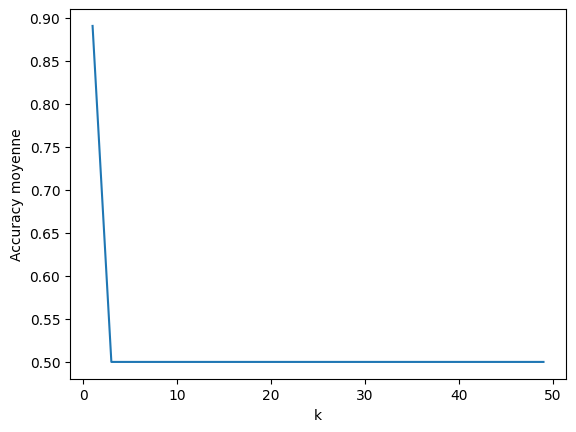

In [18]:
# mélanger des exemples
index = np.random.permutation(len(X2D))
Xm = X2D[index]
Ym = Y2D[index]

# on stocke les accuracies dans une liste :
accuracies = []

nb_iter = 10 #nombre d'itérations de la validation croisée
seuil_k = 50 # seuil max des valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)] # toutes les valeurs de k à regarder:

for k in valeurs_k:
    perf = [] #tableau des accuracies pour cette valeur de k
    
    #validation croisée
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        un_KNN = ClassifierKNN(2, k)
        un_KNN.train(Xapp, Yapp)
        perf.append(un_KNN.accuracy(Xtest, Ytest))
        
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies.append(acc_moy)
    #print("k = " + str(k) + " Taux de bonne classification moyen : " + str(acc_moy))

# Traçage de la courbe des variations d'accuracy
plt.plot(valeurs_k,accuracies)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("k")
plt.show()

Analyse du résultat: on remarque que la valeur $k$ suivante fournit le meilleur résultat : lorsque $k$ = 1

### Recherche du k optimal pour le classifier ClassifierKNN sur une base de test 5D:

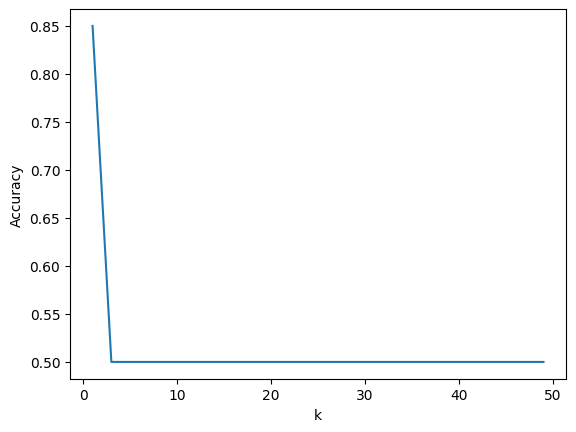

In [19]:
# mélanger des exemples
index = np.random.permutation(len(X5D))
Xm = X5D[index]
Ym = Y5D[index]

# on stocke les accuracies dans une liste :
accuracies = []

nb_iter = 10 #nombre d'itérations de la validation croisée
seuil_k = 50 # seuil max des valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)] # toutes les valeurs de k à regarder:

for k in valeurs_k:
    perf = [] #tableau des accuracies pour cette valeur de k
    
    #validation croisée
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        un_KNN = ClassifierKNN(5, k)
        un_KNN.train(Xapp, Yapp)
        perf.append(un_KNN.accuracy(Xtest, Ytest))
        
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies.append(acc_moy)
    #print("k = " + str(k) + " Taux de bonne classification moyen : " + str(acc_moy))

# Traçage de la courbe des variations d'accuracy
plt.plot(valeurs_k,accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

Analyse du résultat: on remarque que la valeur $k$ suivante fournit le meilleur résultat : lorsque $k$ = 1

### Evolution de l'accuracy au cours de l'apprentissage pour le classifier ClassifierKNN sur une base de test 2D:

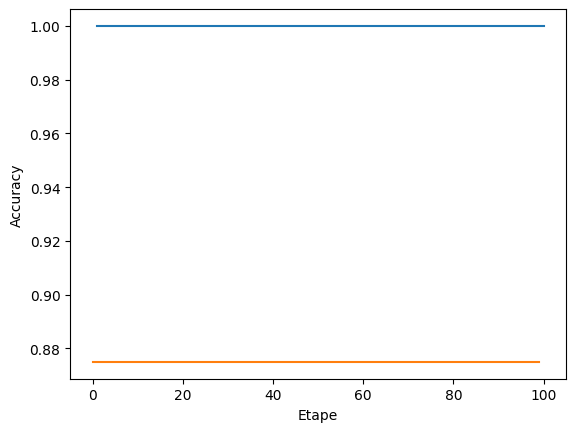

Accuracy finale (train):  1.0
Accuracy finale (test) :  0.875


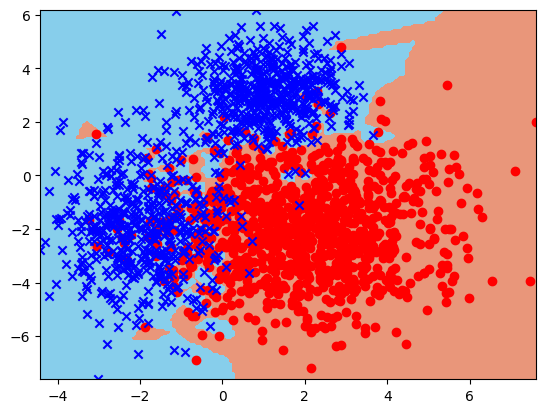

In [20]:
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)


# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []
classifierKNN2 = ClassifierKNN(2, 1)

# Réalisation de N itérations
N = 100
for i in range(N):
    classifierKNN2.train(train_desc, train_label)
    train_acc.append(classifierKNN2.accuracy(train_desc, train_label))
    test_acc.append(classifierKNN2.accuracy(test_desc, test_label))

# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()

# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
ut.plot_frontiere(X2D,Y2D,classifierKNN2,step=150)
ut.plot2DSet(X2D,Y2D)

print("Accuracy finale (train): ",  classifierKNN2.accuracy(train_desc, train_label))
print("Accuracy finale (test) : ", classifierKNN2.accuracy(test_desc, test_label))

### Evolution de l'accuracy au cours de l'apprentissage pour le classifier ClassifierKNN sur une base de test 5D:

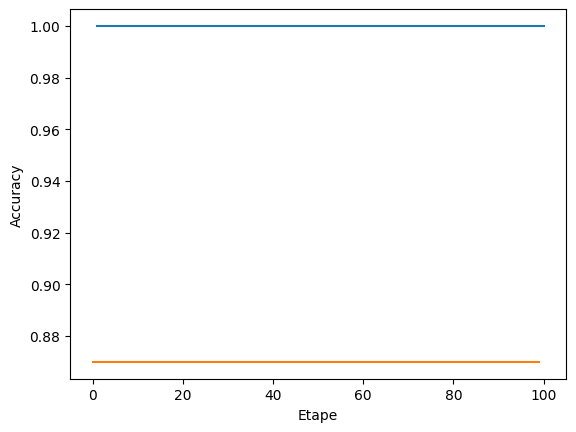

Accuracy finale (train):  1.0
Accuracy finale (test) :  0.87


In [21]:
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X5D, Y5D,900,900)

# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []
classifierKNN2 = ClassifierKNN(5, 1)

# Réalisation de N itérations
N = 100
for i in range(N):
    classifierKNN2.train(train_desc, train_label)
    train_acc.append(classifierKNN2.accuracy(train_desc, train_label))
    test_acc.append(classifierKNN2.accuracy(test_desc, test_label))

# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()


print("Accuracy finale (train): ",  classifierKNN2.accuracy(train_desc, train_label))
print("Accuracy finale (test) : ", classifierKNN2.accuracy(test_desc, test_label))

### Test avec validation croisée en 10 - 2D

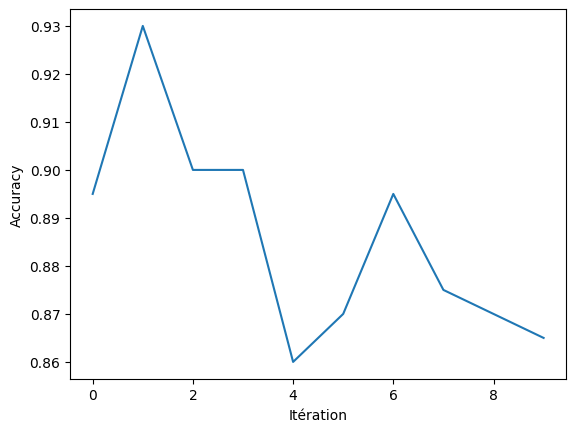

Accuracies obtenues :  [0.895, 0.93, 0.9, 0.9, 0.86, 0.87, 0.895, 0.875, 0.87, 0.865]
Accuracy moyenne :  0.886


In [22]:
un_KNN = ClassifierKNN(2, 1)

nb_iter = 10
perf = []

# 1) mélanger des exemples
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

# 2) réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = ClassifierKNN(2, 1)
    un_KNN.train(Xapp, Yapp)
    perf.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.show()
    
    
print("Accuracies obtenues : ",perf)
print("Accuracy moyenne : ", statistics.mean(perf))

### Test avec validation croisée en 10 - 5D

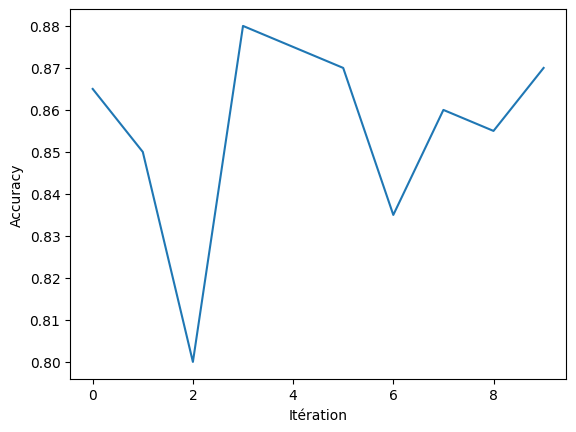

Accuracies obtenues :  [0.865, 0.85, 0.8, 0.88, 0.875, 0.87, 0.835, 0.86, 0.855, 0.87]
Accuracy moyenne :  0.856


In [23]:
un_KNN = ClassifierKNN(2, 1)
train_acc = []
test_acc = []

nb_iter = 10
perf = []

# 1) mélanger des exemples
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]

# 2) réaliser une validation croisée complète 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = ClassifierKNN(5, 1)
    un_KNN.train(Xapp, Yapp)
    perf.append(un_KNN.accuracy(Xtest, Ytest))
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.show()
    
    
print("Accuracies obtenues : ",perf)
print("Accuracy moyenne : ", statistics.mean(perf))

## Etude de la classe ClassifierPerceptron:
Voici la classe ClassifierPerceptron :

In [29]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True ):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        self.init = init
        if(init == True):
            self.w = np.zeros(input_dimension)
        else:
            tmp = np.random.uniform(0,1, input_dimension)
            tmp = tmp*2-1
            self.w = [0.001*i for i in tmp]
        self.allw = [self.w.copy()] # stockage des premiers poids
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """  
        desc_copie = desc_set.copy()
        np.random.shuffle(desc_copie)
        
        for i in range(len(desc_copie)):
            p = self.predict(desc_copie[i])
            indice_xi = np.where(np.all(desc_set == desc_copie[i], axis=1))[0][0]
            yi = label_set[indice_xi]
            
            if(p != yi):
                self.w = self.w + self.learning_rate * yi * desc_copie[i]
                self.allw.append(self.w.copy())
        return
     
    def train(self, desc_set, label_set, nb_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - nb_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """
        res = []
        for i in range(nb_max):
            old_w = self.w
            self.train_step(desc_set, label_set)
            diff = old_w - self.w
            erreur = np.linalg.norm([abs(j) for j in diff])
            res.append(erreur)
            
            if(erreur < seuil):
                break

        return res

    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        v = np.dot(x,self.w)
        return v
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        if (self.score(x) < 0):
            return -1
        else:
            return 1
            
    def get_allw(self):
        return self.allw


### Variation de l'accuracy en fonction de la vitesse d'apprentissage sur une base de test 2D:

e = 0.0 Taux de bonne classification moyen : 0.5
e = 0.1 Taux de bonne classification moyen : 0.772
e = 0.2 Taux de bonne classification moyen : 0.7925
e = 0.30000000000000004 Taux de bonne classification moyen : 0.8025
e = 0.4 Taux de bonne classification moyen : 0.7765
e = 0.5 Taux de bonne classification moyen : 0.7605
e = 0.6000000000000001 Taux de bonne classification moyen : 0.7955
e = 0.7000000000000001 Taux de bonne classification moyen : 0.7715
e = 0.8 Taux de bonne classification moyen : 0.8075
e = 0.9 Taux de bonne classification moyen : 0.78


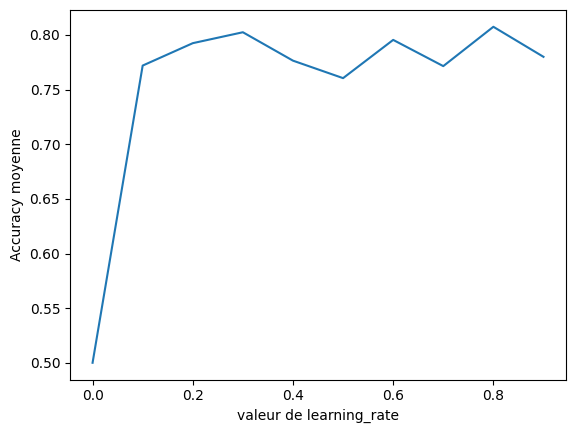

In [28]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
acc_moy = []
nb_iter = 10

#on fait varier le paramètre learning_rate
for e in np.arange(0, 1.0, 0.1):
    perf = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(2,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies.append(acc_moy)
    print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(np.arange(0, 1.0, 0.1),accuracies)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.show()

### Variation de l'accuracy en fonction de la vitesse d'apprentissage sur une base de test 5D:

In [33]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
acc_moy = []
nb_iter = 10

#on fait varier le paramètre learning_rate
for e in np.arange(0, 1.0, 0.1):
    perf = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(5,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies.append(acc_moy)
    print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(np.arange(0, 1.0, 0.1),accuracies)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.show()



e = 0.0 Taux de bonne classification moyen : 0.5
e = 0.1 Taux de bonne classification moyen : 0.847
e = 0.2 Taux de bonne classification moyen : 0.8170000000000001
e = 0.30000000000000004 Taux de bonne classification moyen : 0.843
e = 0.4 Taux de bonne classification moyen : 0.846


KeyboardInterrupt: 

### Variation de l'accuracy en fonction du poids pour ClassifierPerceptron sur une base de test 5D:

In [30]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

# Paramètres pour le perceptron:
dim = 2
eps = 5e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
np.random.seed(42)   # on prend 42 comme graine

perceptron2 = classif.ClassifierPerceptron(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron2.train(Xm, Ym, nb_max=100)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron2.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

ValueError: shapes (5,) and (2,) not aligned: 5 (dim 0) != 2 (dim 0)

### Test avec validation croisée en 10 - 2D

### Test avec validation croisée en 10 - 5D

In [ ]:
learning_rate = 0.01
perceptron1 = ClassifierPerceptron(5, learning_rate)
print("Init perceptron: w= " + str(perceptron1.w))

# -----
# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
random.seed(42)
(train_desc, train_label), (test_desc, test_label) = genere_train_test(data_gauss_desc, data_gauss_label,75,75)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# -----
# Apprentissage pas à pas du perceptron et mémorisation de l'accuracy à chaque étape:
# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []

# Réalisation de N itérations
N = 10
for i in range(N):
    perceptron1.train(train_desc, train_label)
    train_acc.append(perceptron1.accuracy(train_desc, train_label))
    test_acc.append(perceptron1.accuracy(test_desc, test_label))

# -----
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()

# -----
# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(data_gauss_desc,data_gauss_label,perceptron1,step=150)
plot2DSet(data_gauss_desc,data_gauss_label)

print("Accuracy finale (train): ",  perceptron1.accuracy(train_desc, train_label))
print("Accuracy finale (test) : ", perceptron1.accuracy(test_desc, test_label))

## Etude de la classe ClassifierPerceptronBiais:

In [ ]:
class ClassifierPerceptronBiais(classif.ClassifierPerceptron):
    """ Perceptron de Rosenblatt avec biais
        Variante du perceptron de base
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        # Appel du constructeur de la classe mère
        super().__init__(input_dimension, learning_rate, init)
        # Affichage pour information (décommentez pour la mise au point)
        #print("Init perceptron biais: w= ",self.w," learning rate= ",learning_rate)
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        desc_copie = desc_set.copy()
        np.random.shuffle(desc_copie)
        
        for i in range(len(desc_copie)):
            p = self.score(desc_copie[i])
            indice_xi = np.where(np.all(desc_set == desc_copie[i], axis=1))[0][0]
            yi = label_set[indice_xi]
            
            if(p*yi < 1):
                self.w = self.w + self.learning_rate * (yi - p) * desc_copie[i]
                self.allw.append(self.w.copy())
        return